<a href="https://colab.research.google.com/github/Ayaaba-Fatawu-Sumaila/chips-sales-analysis/blob/main/Quantium_Chips_Sales_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Necessary Libraries

In [34]:
import pandas as pd #For data manipulation and wrangling or cleaning
import matplotlib.pyplot as plt #For static visualisation and analysis
import plotly.express as px #For interactive visualisation and analysis
import numpy as np #For manipulating numerical arrays and lists
import seaborn as sns #For visualisation and analysis

from scipy.stats import ttest_ind #This library will help perform the independent hypothesis testing (t-test)

#Cleans up executed code for clearity
import warnings
warnings.filterwarnings('ignore')

### Reading the purchase behaviour file and Exploring

In [35]:
# df1 for purchase_behaviour dataframe

In [36]:
df1 = pd.read_csv("QVI_purchase_behaviour.csv")

In [37]:
shape = df1.shape
print(f"The purchase behaviour data has a total of  {shape[0]} rows and {shape[1]} columns")

The purchase behaviour data has a total of  72637 rows and 3 columns


In [38]:
df1.tail()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget
72636,2373711,YOUNG SINGLES/COUPLES,Mainstream


In [39]:
df1.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

##### Purchase Behaviour Columns
- 'LYLTY_CARD_NBR': loyalty card number column
- 'LIFESTAGE': The various life stages of the customers
- 'PREMIUM_CUSTOMER': The ranking column that categorizes customer segments based on purchasing preferences

In [40]:
df1.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [42]:
df1.duplicated().sum()

np.int64(0)

In [43]:
df1.nunique() #All the 'LYLTY_CARD_NBR' column values are all unique

,0
LYLTY_CARD_NBR,72637
LIFESTAGE,7
PREMIUM_CUSTOMER,3


In [44]:
df1.select_dtypes(include="object").columns #Categorical columns

Index(['LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [45]:
df1.select_dtypes(exclude="object").columns #Numerical columns

Index(['LYLTY_CARD_NBR'], dtype='object')

In [46]:
df1['LIFESTAGE'].unique() #No inconsistences in the 'LIFESTAGE' column

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [47]:
df1['PREMIUM_CUSTOMER'].unique() #No inconsistencies in the 'PREMIUM_CUSTOMER' column

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [48]:
df1['LYLTY_CARD_NBR'].unique()

array([   1000,    1002,    1003, ..., 2370751, 2370961, 2373711])

In [49]:
df1.describe(exclude=[np.number]) #Statistical summary of the Categorical columns

,LIFESTAGE,PREMIUM_CUSTOMER
count,72637,72637
unique,7,3
top,RETIREES,Mainstream
freq,14805,29245


- The above summary of the data indicates that, most of the customers in the LIFESTAGE column are RETIREES
- Also, the Premium Customer which is customer segment, most of the customers falls under the Mainstream

In [50]:
df1.describe() #This is a summary of the unique loyalty card numbers

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


##### Saving the purchase behaviour data

In [51]:
df1.to_csv("cleaned_purchase_behaviour.csv")

### Reading the transaction data file and Exploring

In [52]:
#df2 for transaction_data dataframe

In [53]:
df2 = pd.read_excel("QVI_transaction_data.xlsx")

In [54]:
df2.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,43365,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [55]:
shape = df2.shape
print(f"The transaction data has a total of  {shape[0]} rows and {shape[1]} columns")

The transaction data has a total of  264836 rows and 8 columns


- From the purchasing behavior and transaction data, 'LYLTY_CARD_NBR' column is common in both datasets
- Hence, we can  merge these two dataframes using 'LYLTY_CARD_NBR' column as the foreign key

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [57]:
df2.isnull().sum() #No Null values are seen in our datasets

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [58]:
df2.nunique() #Checking for the sum of unique values per column in the datasets

,0
DATE,364
STORE_NBR,272
LYLTY_CARD_NBR,72637
TXN_ID,263127
PROD_NBR,114
PROD_NAME,114
PROD_QTY,6
TOT_SALES,112


In [59]:
df2.duplicated().sum()

np.int64(1)

In [60]:
df2.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

##### Transaction data columns
- 'DATE': The daily records date
- 'STORE_NBR': The numbers for the individual stores
- 'LYLTY_CARD_NBR': The loyalty card number
- 'TXN_ID': The unique transaction ID
- 'PROD_NBR': The unique product numbers
- 'PROD_NAME': The names of products in the store
- 'PROD_QTY': The daily quantity of products purchased per customer
- 'TOT_SALES': The daily total sales of product(s) to an individual customer

In [61]:
df2.describe().style.background_gradient() #Numeric statistical summary

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.000000,264836.000000,264836.000000,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.080110,135549.476404,135158.310815,56.583157,1.907309,7.304200
std,105.389282,76.784180,80579.978022,78133.026026,32.826638,0.643654,3.083226
min,43282.000000,1.000000,1000.000000,1.000000,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,70021.000000,67601.500000,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,130357.500000,135137.500000,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,203094.250000,202701.250000,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2373711.000000,2415841.000000,114.000000,200.000000,650.000000


#### Observations made from the described data
- From the above statistical summary, it shows that there are high variation between the mean values and the maximum values of the 'PROD_QTY' and 'TOT_SALES' columns. Showing potential outliers in these columns which requires cleaning to prevent bias modeling.
- The data type of the DATE column is int, hence we need to convert it to datetime in order to perform time series analysis
- We can use boxplot and histogram to determine potential outliers in the "LYLTY_CARD_NBR" and "TXN_ID" columns

### Wrangle Functoin for cleaning the transaction data

In [62]:
%%time
def wrangle(file_path):
    #Reading the excel file
    df2 = pd.read_excel(file_path)

    #Dropping the duplicate row in the transaction data
    df2.drop_duplicates(inplace=True)

    #Convert the DATE column into datetime datatype with an origin set to '1899-12-30'
    df2["DATE"] = pd.to_datetime(df2.DATE, unit='D',origin=pd.Timestamp('1899-12-30'))

    #Derive months from the DATE columns
    df2["MONTH"] = df2["DATE"].dt.month

    #convert all product names to lower case
    df2["PROD_NAME"] =  df2["PROD_NAME"].str.lower()

    #Removing special characters like '&','/' from the PROD_NAME column
    df2["PROD_NAME"] =  df2["PROD_NAME"].str.replace('&'," ",regex=False)
    df2["PROD_NAME"] =  df2["PROD_NAME"].str.replace('/'," ",regex=False)

    #Creating a new column for product size, by extracting the numerical values from the PROD_NAME column
    df2["PACK_SIZE"] = df2['PROD_NAME'].str.extract('(\d+)').astype(int)

    #Convert all product names containing the word 'salsa' to 0, and the rest of the products to 1
    #Since we are much interested in chips products
    #We are not interested in salsa products
    df2["CHIPS"] = df2["PROD_NAME"].map(lambda x: 0 if "salsa" in x else 1)

    #Derive the brand name from the PROD_NAME, by using the first string in the product name
    df2["BRAND"] = df2["PROD_NAME"].str.split().str[0]


    #correcting inconsistent BRAND values
    df2.loc[df2["BRAND"].isin(["red", "rrd"]), "BRAND"] = "red rock deli"
    df2.loc[df2["BRAND"].isin(["infuzions", "infzns"]), "BRAND"] = "infuzions"
    df2.loc[df2["BRAND"].isin(["snbts", "sunbites"]), "BRAND"] = "sunbites"
    df2.loc[df2["BRAND"].isin(["smith", "smiths"]), "BRAND"] = "smiths"
    df2.loc[df2["BRAND"].isin(["dorito", "doritos"]), "BRAND"] = "doritos"
    df2.loc[df2["BRAND"].isin(["grnwves","grain"]), "BRAND"] = "grain waves"
    df2.loc[df2["BRAND"].isin(["ncc","natural"]), "BRAND"] = "natural"


    #Identifying and cleaning outliers to improve the quality of the data for analysis and model training
    #Supporting visualisations like boxplot and histogram for clear outliers detection
    df2 = df2[(df2.PROD_QTY < 6)] #Dropping outliers of product quantity greater than 6

    #Dropping Total sales greater than 15.5
    df2 = df2[(df2.TOT_SALES < 15.5)]

    #Dropping  loyalty card number greater than 0.5M(500_000)
    df2 = df2[(df2["LYLTY_CARD_NBR"] < 500_000)]

    #Dropping TXN_ID values greater than 0.5M(500_000)
    df2 = df2[(df2["TXN_ID"] < 500_000)]
    return df2


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 13.6 µs


In [63]:
%%time
#Calling the wrangle function for the cleaned transaction data
df2 = wrangle("QVI_transaction_data.xlsx")

CPU times: user 23.4 s, sys: 126 ms, total: 23.5 s
Wall time: 23.6 s


In [64]:
#This line of code help us identify the unique values in the product name variable
#df2[(df2.CHIPS ==1 )].PROD_NAME.unique()

In [65]:
#Individual brand names
df2.BRAND.unique()

array(['natural', 'ccs', 'smiths', 'kettle', 'old', 'grain waves',
       'doritos', 'twisties', 'ww', 'thins', 'burger', 'cheezels',
       'infuzions', 'red rock deli', 'pringles', 'tyrrells', 'cobs',
       'woolworths', 'french', 'tostitos', 'cheetos', 'sunbites'],
      dtype=object)

##### Save the cleaned data into .csv file

In [66]:
df2.to_csv("Cleaned_QVI_transaction_data.csv")

##### The two datasets have one similar column name 'LYLTY_CARD_NBR', hence we can merge df1 and df2

 Merging/Joining the purchase_behaviour and the transaction dataframes

In [67]:
df = df1.merge(df2,on='LYLTY_CARD_NBR')

In [68]:
df.sample(5) # Displaying a sample of the dataframe for a clear picture and ready for analysis

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,MONTH,PACK_SIZE,CHIPS,BRAND
102611,104202,YOUNG FAMILIES,Mainstream,2019-02-02,104,104960,35,woolworths mild salsa 300g,2,3.0,2,300,0,woolworths
62839,67079,YOUNG FAMILIES,Premium,2019-05-23,67,64289,11,rrd pc sea salt 165g,2,6.0,5,165,1,red rock deli
31607,36080,OLDER SINGLES/COUPLES,Premium,2018-09-02,36,32338,44,thins chips light tangy 175g,2,6.6,9,175,1,thins
26397,30089,RETIREES,Budget,2018-08-11,30,27023,109,pringles barbeque 134g,2,7.4,8,134,1,pringles
189667,194168,OLDER SINGLES/COUPLES,Budget,2019-01-20,194,193968,28,thins potato chips hot spicy 175g,2,6.6,1,175,1,thins


##### Saving the final data into a .csv file

In [69]:
df.to_csv("final_customer_transaction_data.csv",index=False)

### Exploratory Analysis & Visualisation of The Final Data

In [70]:
df.shape

(264283, 14)

In [71]:
#numerical data
df.describe().style.background_gradient(cmap='bone_r')

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,MONTH,PACK_SIZE,CHIPS
count,264283.000000,264283,264283.000000,264283.000000,264283.000000,264283.000000,264283.000000,264283.000000,264283.000000,264283.000000
mean,135248.310035,2018-12-30 01:06:01.644146688,135.077285,135134.368703,56.590257,1.900958,7.274342,6.535456,182.379570,0.931649
min,1000.000000,2018-07-01 00:00:00,1.000000,1.000000,1.000000,1.000000,1.500000,1.000000,70.000000,0.000000
25%,70017.500000,2018-09-30 00:00:00,70.000000,67581.500000,28.000000,2.000000,5.400000,4.000000,150.000000,1.000000
50%,130352.000000,2018-12-30 00:00:00,130.000000,135123.000000,56.000000,2.000000,7.400000,7.000000,170.000000,1.000000
75%,203086.000000,2019-03-31 00:00:00,203.000000,202674.500000,85.000000,2.000000,8.800000,10.000000,175.000000,1.000000
max,272392.000000,2019-06-30 00:00:00,272.000000,270209.000000,114.000000,5.000000,15.300000,12.000000,380.000000,1.000000
std,76787.384549,nan,76.788653,78007.412952,32.825066,0.323716,2.459390,3.451599,64.284972,0.252348


In [72]:
#categorical data statisticl summary
df.describe(include=[object])

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NAME,BRAND
count,264283,264283,264283,264283
unique,7,3,114,22
top,OLDER SINGLES/COUPLES,Mainstream,kettle tortilla chpshny jlpno chili 150g,kettle
freq,54347,101780,3285,41129


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264283 entries, 0 to 264282
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264283 non-null  int64         
 1   LIFESTAGE         264283 non-null  object        
 2   PREMIUM_CUSTOMER  264283 non-null  object        
 3   DATE              264283 non-null  datetime64[ns]
 4   STORE_NBR         264283 non-null  int64         
 5   TXN_ID            264283 non-null  int64         
 6   PROD_NBR          264283 non-null  int64         
 7   PROD_NAME         264283 non-null  object        
 8   PROD_QTY          264283 non-null  int64         
 9   TOT_SALES         264283 non-null  float64       
 10  MONTH             264283 non-null  int32         
 11  PACK_SIZE         264283 non-null  int64         
 12  CHIPS             264283 non-null  int64         
 13  BRAND             264283 non-null  object        
dtypes: d

In [74]:
df.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0
DATE,0
STORE_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [75]:
df.duplicated().sum()

np.int64(0)

In [76]:
df.nunique()

,0
LYLTY_CARD_NBR,72560
LIFESTAGE,7
PREMIUM_CUSTOMER,3
DATE,364
STORE_NBR,272
TXN_ID,262578
PROD_NBR,114
PROD_NAME,114
PROD_QTY,5
TOT_SALES,84


### Since we are interested in CHIPS categories, let's keep the chips products as one and the rest as zero

- Only chips products analysis

In [77]:
df_chips = df[df["CHIPS"]==1].set_index("DATE")

In [78]:
df_chips.sample(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,MONTH,PACK_SIZE,CHIPS,BRAND
DATE,,,,,,,,,,,,,
2018-07-12,130177,YOUNG SINGLES/COUPLES,Mainstream,130,134396,90,tostitos smoked chipotle 175g,2,8.8,7,175,1,tostitos
2018-07-16,97123,RETIREES,Mainstream,97,97051,72,ww crinkle cut original 175g,2,3.4,7,175,1,ww
2019-02-05,106259,OLDER FAMILIES,Mainstream,106,108311,77,doritos corn chips nacho cheese 170g,2,8.8,2,170,1,doritos
2018-07-26,89299,YOUNG SINGLES/COUPLES,Mainstream,89,88459,90,tostitos smoked chipotle 175g,1,4.4,7,175,1,tostitos
2019-06-05,57045,OLDER FAMILIES,Mainstream,57,51533,112,tyrrells crisps ched chives 165g,2,8.4,6,165,1,tyrrells


##### Checking for the correlation of the dataset

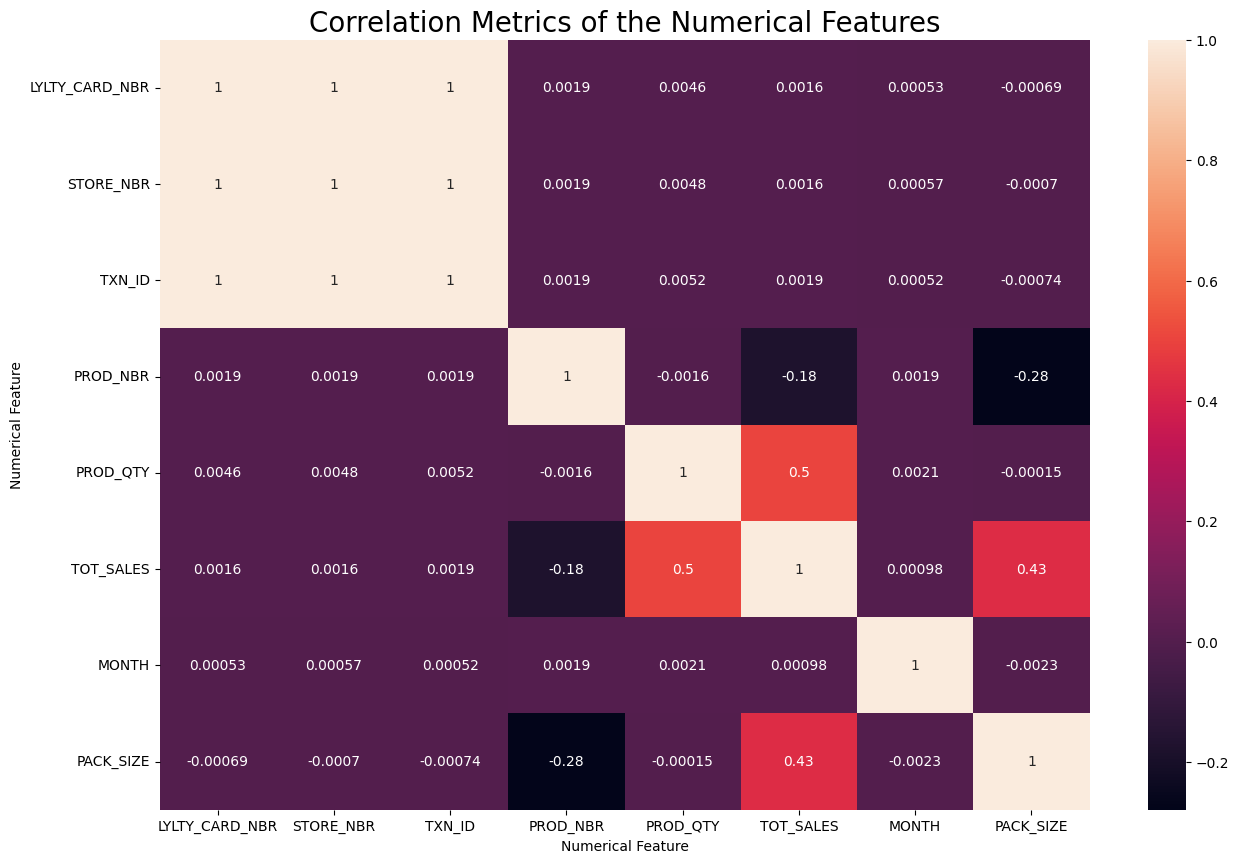

In [79]:
feature_corr = df_chips.select_dtypes(exclude="object").drop(["CHIPS"],axis=1).corr()

plt.figure(figsize=(15,10))
sns.heatmap(feature_corr,annot=True)
plt.title("Correlation Metrics of the Numerical Features",fontsize=20)
plt.xlabel("Numerical Feature")
plt.ylabel("Numerical Feature");

- The correlation indicates that, total sales has a moderate positive correlation with product quantity, therefore an increase in product quantity increases total sales. Meaning the higher the number of products bought the higher the total price.
- The total sales has a moderate positive correlation with the pack size, indicating an increase in pack size leads to a moderate slight increase in total sales.
- Total sales has a weak negative correlation with the product number indication an increase in product number leads to a slight decrease in total sales.
- However Transaction Id, Store Number and Loyalty Card Number have a very weak positive correlation with Total Sales, showcasing that as these variables increases total sales tend to increase slightly
- Interesting, perfect positive correlation between Transaction Id, Store Number and Loyalty Card Number variables. Meaning these variables plays similar role and if one of those variables increases so do all and the vice versa.
- Therefore we need to drop two of these variables Transaction Id, Store Number and Loyalty Card Number in our model training feature selection

##### The impact of loyalty card number on sales

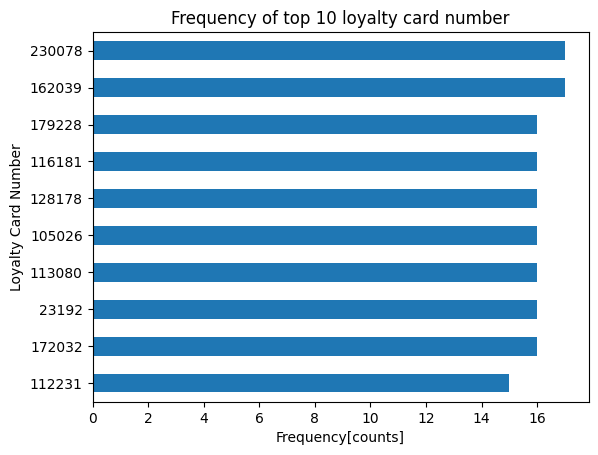

In [80]:
#Top 10 loyalty number frequencies
loyalty_freq = df_chips.LYLTY_CARD_NBR.value_counts().sort_values().tail(10)
loyalty_freq.plot(kind="barh")
plt.xlabel("Frequency[counts]")
plt.ylabel("Loyalty Card Number")
plt.title("Frequency of top 10 loyalty card number")
plt.savefig("high-frequency-of-loyalty-number.png");

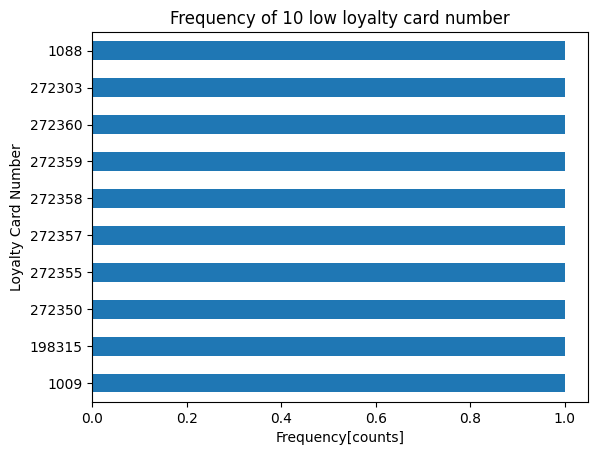

In [81]:
# 10 low loyalty number frequencies.
loyalty_freq = df_chips.LYLTY_CARD_NBR.value_counts().sort_values().head(10)
loyalty_freq.plot(kind="barh")
plt.xlabel("Frequency[counts]")
plt.ylabel("Loyalty Card Number")
plt.title("Frequency of 10 low loyalty card number")
plt.savefig("low-frequency-of-loyalty-number.png");

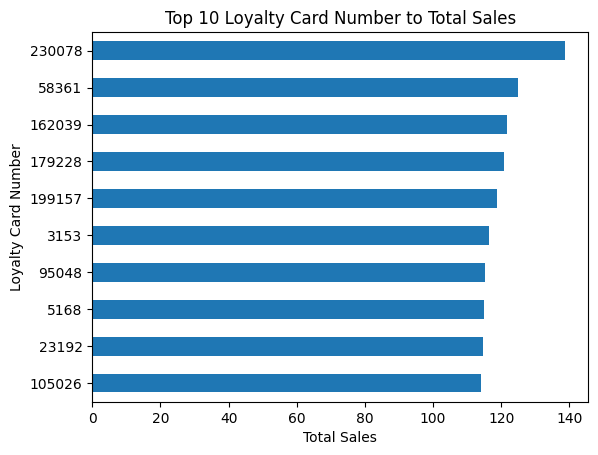

In [82]:
#Using the total sales by loyalty number to identify the impact of the frequency of loyalty card
df_chips.groupby('LYLTY_CARD_NBR')["TOT_SALES"].sum().sort_values().tail(10).plot(kind='barh')
plt.title("Top 10 Loyalty Card Number to Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Loyalty Card Number")
plt.savefig("purchase-of-loyalty-number.png");

- From the above analysis, it indicates that customers with higher number of loyalty cards tend to purchase more of the products
- Hence retailers should encourage giving out more loyalty card number to encourage customer purchasing experience to boost sales

##### Let's uncover the PPROD_NUMBER possible effects on sales

In [83]:
product_num_sales = df_chips.groupby("PROD_NBR")["TOT_SALES"].sum()

fig = px.bar(data_frame=product_num_sales)
fig.update_layout(xaxis_title="PRODUCT NUMBER",yaxis_title="TOTAL SALES",title="PRODUCT NUMbER TO TOTAL SALES")
fig.show()

- From the above analysis, there is a clear picture indicating the higly purchased product numbers as well as the lower ones .
- This can help retailers track unique chips products in stock and to be able to identify highly performing product numbers such as [4,7,14,16,20,23,32,36,46,88,89,102]. Which will improve stock management and provide a chance of improving sales of the lower perfroming product numbers and maintaing highly performing products.

##### Entire stores chips sales performance from 2018 to 2019

In [84]:
#Total sales of chips per store to identify the highly performing chips sales stores and the low performing chips stores

In [85]:
entire_chips_stores_sales = df_chips.groupby('STORE_NBR')['TOT_SALES'].sum()

In [86]:
fig = px.line(data_frame=entire_chips_stores_sales,
        x=entire_chips_stores_sales.index,
        y=entire_chips_stores_sales.values
             )

fig.update_layout(xaxis_title="STORE NUMBER",yaxis_title="TOTAL SALES",title="TOTAL CHIPS SALES PER STORE FROM 2018 TO 2019")
fig.show()

##### The stores performace in the year 2018

In [87]:
chips_stores_performance2018 = df_chips[(df_chips.index.year==2018)].groupby('STORE_NBR')['TOT_SALES'].sum()

In [88]:
fig = px.line(data_frame=chips_stores_performance2018,
              x=chips_stores_performance2018.index,
              y=chips_stores_performance2018.values
             )
fig.update_layout(xaxis_title="STORE NUMBER",yaxis_title="TOTAL SALES",title="TOTAL CHIPS SALES PER STORE IN 2018")
fig.show()

##### The stores performace in the year 2019

In [89]:
chips_stores_performance2019 = df_chips[(df_chips.index.year==2019)].groupby('STORE_NBR')['TOT_SALES'].sum()

In [90]:
fig = px.line(data_frame=chips_stores_performance2019,
              x=chips_stores_performance2019.index,
              y=chips_stores_performance2019.values)
fig.update_layout(xaxis_title="STORE NUMBER",yaxis_title="TOTAL SALES",title="TOTAL CHIPS SALES PER STORE IN 2019")
fig.show()

In [91]:
total_sales2018 = sum(df_chips[(df_chips.index.year==2018)].groupby('STORE_NBR')['TOT_SALES'].sum())

In [92]:
total_sales2019 = sum(df_chips[(df_chips.index.year==2019)].groupby('STORE_NBR')['TOT_SALES'].sum())

In [93]:
sales_percentage2018 = (total_sales2018/(total_sales2018+total_sales2019))*100

In [94]:
sales_percentage2019 = (total_sales2019/(total_sales2018+total_sales2019))*100

In [95]:
sales_diff = (sales_percentage2018 - sales_percentage2019)

In [96]:
avg_store_sales = (total_sales2018+total_sales2019)/len(df_chips.STORE_NBR.unique())

In [97]:
print(f"The percentage chips sales difference between 2018 and 2019 is : {round(sales_diff,3)}%")
print(f"The percentage of chips sales in 2018 is : {round(sales_percentage2018,3)}% ")
print(f"The percentage of chips sales in 2019 is : {round(sales_percentage2019,3)}%")
print(f"The average chips total sales per store from 2018 to 2019 is : {round(avg_store_sales,3)}")

The percentage chips sales difference between 2018 and 2019 is : 0.965%
The percentage of chips sales in 2018 is : 50.482% 
The percentage of chips sales in 2019 is : 49.518%
The average chips total sales per store from 2018 to 2019 is : 6624.394


* From the above analysis it shows that store numbers such as [4,26,40,58,88,165,199,203,226 and 237], has higher total chips product sales from 2018 to 2019.
In the order hand store numbers [11,42,92,117,139,140,146,158,159,177,192,198,206,252,263,267], has lower chips product sales from 2018 to 2019. These low sales maybe due to the location of these stores.
* The year 2018: store  numbers [4,58,88,165,199,203,226,237]  had higher chips products sales in the year 2018.
* The year 2019: store numbers [40,88,165] showed a significant improvement in chips sales during 2019, with a drop in sales for store numbers [4,58,199,203,226,237].
Generally in 2018 the total performance of chips sales is by 0.97% greater than 2019 showing a slide drop in the total sales of chips products in 2019.  
The possible average total sales of chips product for each store is 6624.394.
##### Possible factors that can affect the chips sales
- This maybe due to the location of the store. Urban areas will tend to purchase more than Rural areas.
- The management of the store too plays an important role in organising and boosting sales
- The arrangement and the location of the chips in the store can improve customer purchasing behaviour
- Gaining information from the highly performing chips sales stores can improve the strategic planning of the low performing chips stores to boost their chips sales.
- The drop in chips product sales in 2019 might be the differences in the months of sales
- This could also be a seasonal impact on sales of chips as well as holidays period
- It could also be the amount of chips products in stock per month. The availability of chips products in stock can also improve consumer purchasing experience.


In [98]:
df_chips[(df_chips.index.year==2018)].index.month.unique()

Index([10, 9, 11, 12, 7, 8], dtype='int32', name='DATE')

For 2018 chips sales were done in the months ["July","August","September","October","November","December"]

In [99]:
df_chips[(df_chips.index.year==2019)].index.month.unique()

Index([3, 6, 4, 1, 5, 2], dtype='int32', name='DATE')

For 2019 chips sales were done in the months ["January","February","March","April","May","June"]

#### Let's observe the brand of chips the customers purchase much

In [100]:
brand_sales = df_chips[["BRAND","TOT_SALES"]]
brand_total_sales = brand_sales.groupby('BRAND')['TOT_SALES'].sum().sort_values()
fig = px.bar(brand_total_sales)
fig.update_layout(xaxis_title="PRODUCT BRAND",yaxis_title="TOTAL SALES",title="PRODUCT BRAND BY TOTAL SALES")
fig.show()

In [101]:
brand_quant_count = df_chips.groupby("BRAND")["PROD_QTY"].sum().sort_values()

In [102]:
fig = px.bar(brand_quant_count)
fig.update_layout(xaxis_title="BRAND",yaxis_title="TOTAL PRODUCT QUANTITY",title="TOTAL QUANTITY OF BRAND PURCHASED")
fig.show()

In [103]:
# Checking for the average unit price of each brand product
unit_price = df_chips[df_chips["PROD_QTY"]==1].groupby("BRAND")["TOT_SALES"].mean().sort_values()

fig = px.bar(data_frame = unit_price,
             y=unit_price.index,
             x=unit_price.values)
fig.update_layout(xaxis_title="UNIT PRICE",yaxis_title="BRAND NAME",title="BRAND PER UNIT PRICE")
fig.show()

- Generally, the analysis indicates that the total quantity of chips purchased positively impacts total sales. The higher the quantity purchased, the higher the total sales, with an exception of certain chips brands. This is due to their unit average prices: Example, doristos chips have a higher average unit price of 4.56, while smiths chips have a lower average unit price of 3.65 leading to a higher total sales of the doritos to smiths chips brand even though the quantity of smiths chips purchased are more than doritos. Hence the average unit price of each chips brand has a greater impact on total sales.
- Now it's obvious that most of our customers do not purchase much of the french,woolworths,burger,cheetos,sunbites, css, and cheezels brands.
-  But they tends to prefer kettle, smiths, doritos and pringles chips brand.
-  Getting an information of the total product quantity of each chips brand in stock can also help improve sales
- Customers tends to purchase more of chips product with higher average unit price and this maybe due to the quality of the product.
- And buy less of the chips products with lower average unit price below 3.30 and this maybe due to low quality of the chips product brand.
- This shows that the average sales prices per brand chips affects customer purchasing behaviour

#### Prefered PACK SIZE by customers

In [104]:
prefered_pack_size = df_chips.groupby("PACK_SIZE")["PROD_QTY"].sum()

In [105]:
fig = px.bar(prefered_pack_size)
fig.update_layout(xaxis_title="PACK SIZE",yaxis_title="TOTAL PRODUCT QUANTITY",title="THE PREFERED PACK SIZE BY CUSTOMERS ")
fig.show()

- Customers showed a higher demand for chips product with 170g pack size, followed by 150g.
- They moderately buy PACK SIZE 110g and 134g, 165g, 170g and 330g.
- But purchases less of chips produt with 70g, 90g, 125g, 135g, 160g, 180g, 190g, 200g, 210g, 220g, 250g, 270g and 380g pack sizes.
- These information helps us identify the size of chips product customers prefers most, to help retailers maintain them and to improves sales.

###### Let's check for the specific kettle product size and names custommers purchase most

In [106]:
kettle_prod = df_chips[(df_chips["BRAND"]=="kettle")].groupby("PROD_NAME")["PROD_QTY"].sum().sort_values()

fig = px.bar(data_frame = kettle_prod,
             y =kettle_prod.index,
             x = kettle_prod.values
      )
fig.update_layout(xaxis_title="PRODUCT QUANTITY",yaxis_title="KETTLE PRODUCTS",title="KETTLE PRODUCTS PURCHASED QUANTITY")
fig.show()

- Generally customers purchases much of kettle products with size 175g and 150g

##### Let's check for the specific smith products custommers purchase most

In [107]:
smith_prod = df_chips[(df_chips["BRAND"]=="smiths")].groupby("PROD_NAME")["PROD_QTY"].sum().sort_values()

fig = px.bar(data_frame = smith_prod,
             y =smith_prod.index,
             x = smith_prod.values
      )
fig.update_layout(xaxis_title="PRODUCT QUANTITY",yaxis_title="SMITH PRODUCTS",title="SMITH PRODUCTS PURCHASED QUANTITY")
fig.show()

- I can find something interesting, generally customers prefers chips product with size 150g and 175g but tend to buy much of the smith products with 380g and 330g sizes.
- This can also be due to the variation in different 170g and 175g smith products in stock

#### Individual Customer prefered PACK SIZE

##### Premium Customers prefered pack sizes

In [108]:
premium_pack_behaviour = pd.crosstab(index=df_chips["PACK_SIZE"],columns=df_chips["PREMIUM_CUSTOMER"])

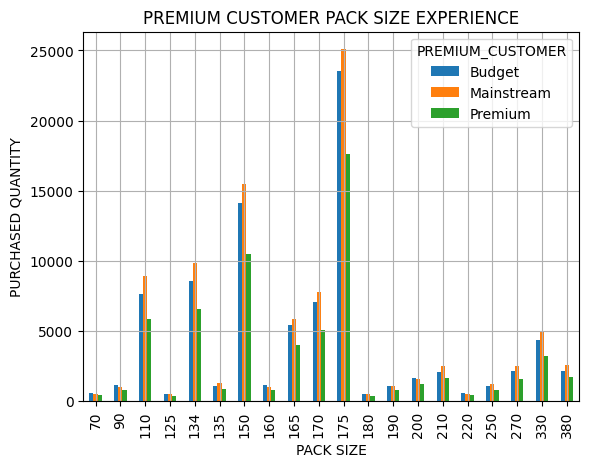

In [109]:
premium_pack_behaviour.plot(kind="bar")
plt.grid()
plt.xlabel("PACK SIZE")
plt.ylabel("PURCHASED QUANTITY")
plt.title("PREMIUM CUSTOMER PACK SIZE EXPERIENCE");

- The Premium Customers Premium, Budget and Maintream prefers PACK SIZE 150g and 175g in an increasing order respectively
- But Budget slidely prefers PACK SIZE 160g and 200g to Mainstream and Premium
- Generally mainstream customers purchasis more of the product and this is due to the higher frequency of mainstream customers

##### Lifestage Customers prefered pack sizes

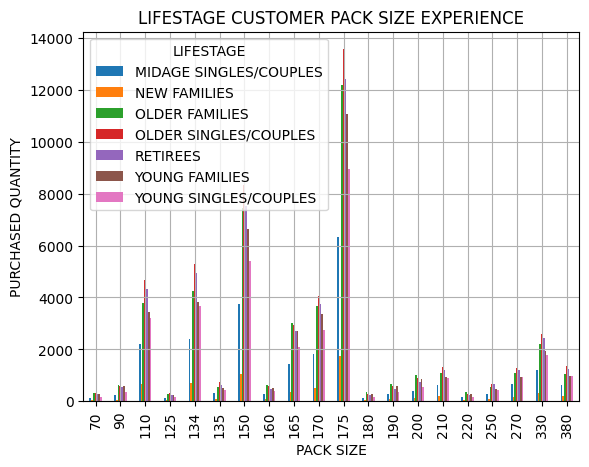

In [110]:
lifestage_pack_behaviour = pd.crosstab(index=df_chips["PACK_SIZE"],columns=df_chips["LIFESTAGE"])
lifestage_pack_behaviour.plot(kind="bar")
plt.grid()
plt.xlabel("PACK SIZE")
plt.ylabel("PURCHASED QUANTITY")
plt.title("LIFESTAGE CUSTOMER PACK SIZE EXPERIENCE");

- LIFESTAGE OLDER SINGLES/COOUPLES, RETIREES, OLDER FAMILIES prefers much of 150g and 175g pack sizes in a decreasing order of preference. But NEW FAMILIES purchase less of 175g of PACK SIZE and this maybe due to the population of new families availabe.
- The above visualisation shows that, generally OLDER SINGLES/COOUPLES purchases more of the chips product.

#### Prefered Quantity of Chips purchased per Product Brand

In [111]:
brand_per_quant = pd.crosstab(index=df_chips["BRAND"],columns=df_chips["PROD_QTY"])

In [112]:
fig = px.bar(data_frame=brand_per_quant,barmode="group")
fig.update_layout(xaxis_title="BRAND NAME",yaxis_title="TOTAL QUANTITY PURCHASED",title="Daily Total Quantity of Brand Product(s) Purchased Per Customer")
fig.show()

- Generally customers mostly buy two quantity of chips product.
- Followed by a single quantity of chips product and purchases few of the quantity for the rest Product Quantities

#### Transactions per day

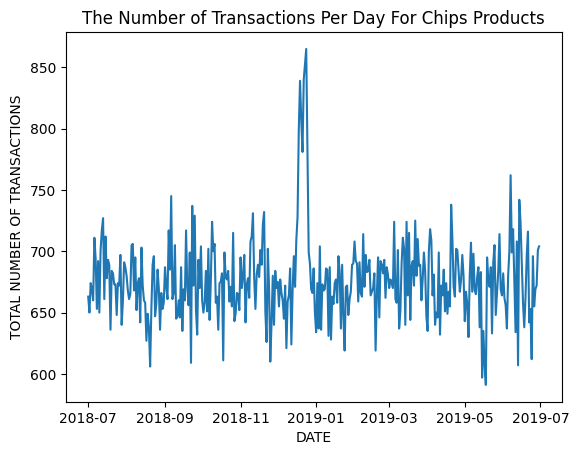

In [113]:
sns.lineplot(df_chips.index.value_counts())
plt.title("The Number of Transactions Per Day For Chips Products",fontsize=12)
plt.xlabel("DATE")
plt.ylabel("TOTAL NUMBER OF TRANSACTIONS")
plt.savefig("chips-total-daily-transaction.png");

- There is high transactions during December, and this maybe due to the holidays period
- There is an approximately 210 transactions per day

<Axes: xlabel='DATE', ylabel='count'>

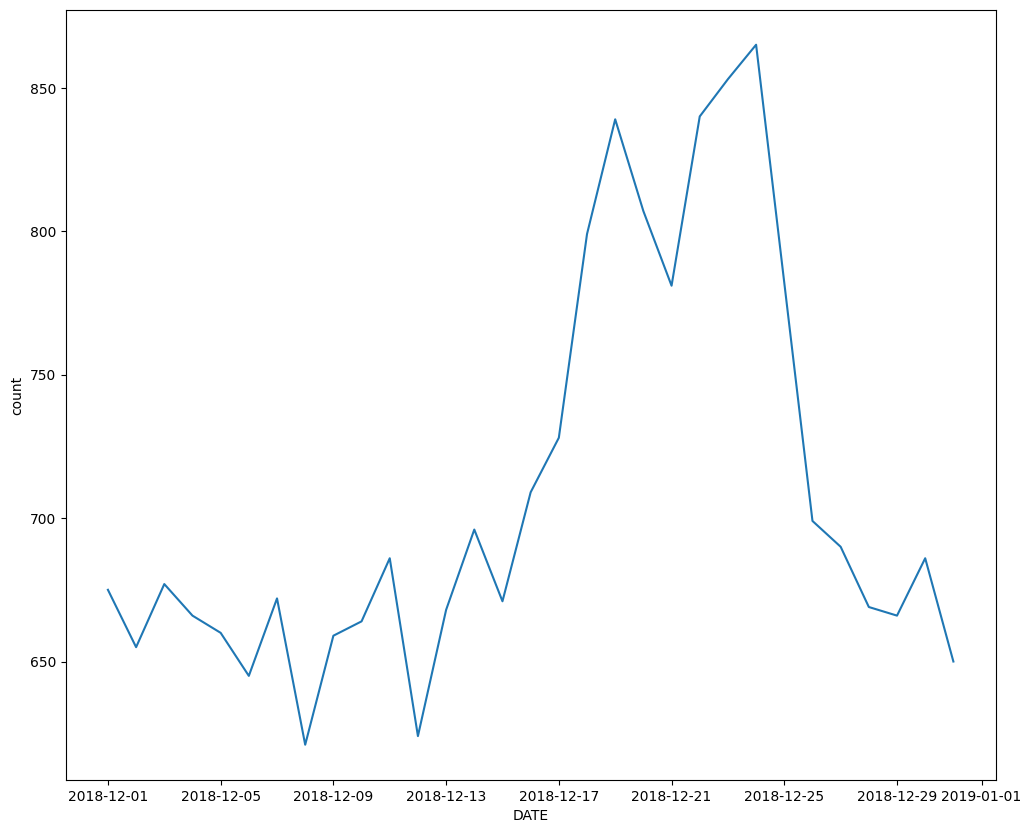

In [114]:
#Let's observe for transactions during the month of Deecember
december_transaction = df_chips[(df_chips.MONTH == 12)].index.value_counts()
plt.figure(figsize=(12,10))
sns.lineplot(december_transaction)

- This clearly shows an increase in sales during the holidays period of December. Retailers can do promotion of lower sales goods as well as advertisement or exhibition to attract customers.

### Let's Observe the Total Sales

- Let's observe the chips products sales per day

In [115]:
total_sales_per_time = df_chips.groupby("DATE")["TOT_SALES"].sum()

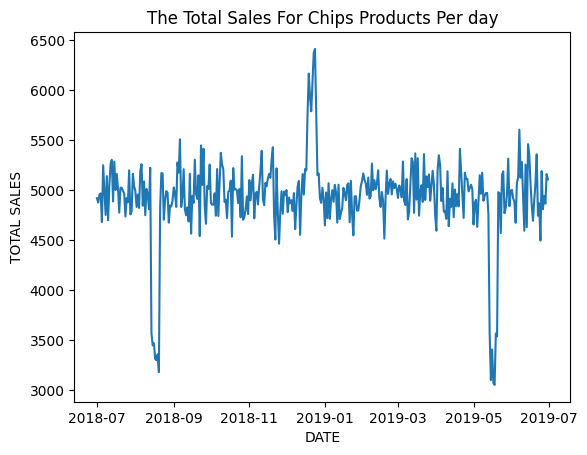

In [116]:
sns.lineplot(total_sales_per_time)
plt.title("The Total Sales For Chips Products Per day",fontsize=12)
plt.xlabel("DATE")
plt.ylabel("TOTAL SALES")
plt.savefig("daily-total-chips-sales.png");

In [117]:
fig = px.line(data_frame=total_sales_per_time ,x=total_sales_per_time.index,y=total_sales_per_time.values)
fig.update_layout(xaxis_title="DATE",yaxis_title="TOTAL SALES",title="The Total Sales For Chips Products Per day")
fig.show();

##### Total Monthly Sales

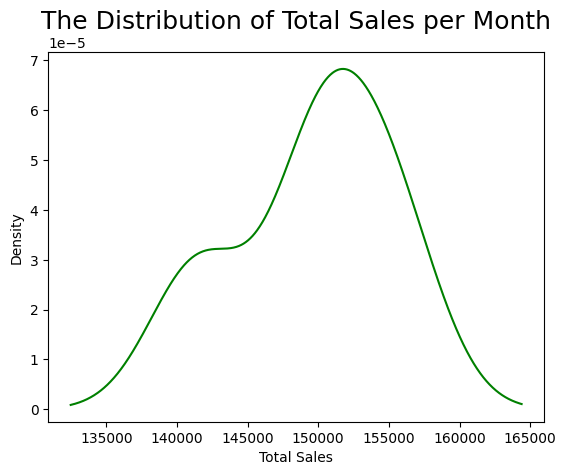

In [118]:
monthly_sales = df_chips.groupby("MONTH")["TOT_SALES"].sum()

monthly_sales.plot(kind="kde",color='g')
plt.ylabel("Density")
plt.xlabel("Total Sales")
plt.title("The Distribution of Total Sales per Month",fontsize=18);

In [119]:
monthly_sales

,TOT_SALES
MONTH,
1,151593.80
2,140460.50
3,155772.80
4,149374.20
5,141687.75
6,150054.80
7,154472.90
8,142394.00
9,149989.90


- There are higher chips product total sales during December and a drop in sales during February, August and May.
- The possible causes in the drop of sales during February, August and May. This maybe due to events of not opening the stores early on these specific days.
- There is a normal distribution of total sales per month, with the Month of February, August and May having the lower sales.

### Non chips products sales

In [120]:
df_nochips = df[df["CHIPS"]==0] #Let's also observe the number of transactions for the non-chips products
non_chips_sales_per_time  = df_nochips.groupby("DATE")["TOT_SALES"].sum()

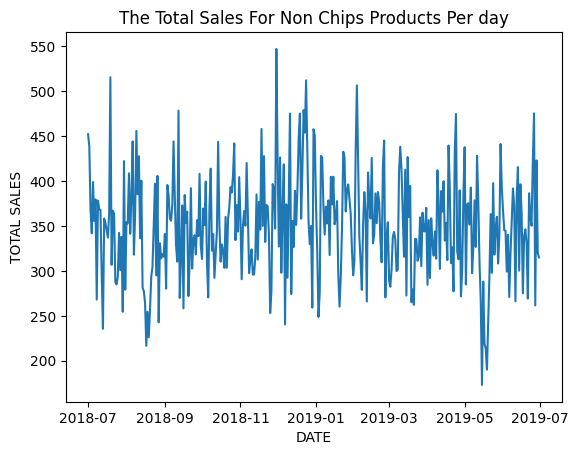

In [121]:
sns.lineplot(x=non_chips_sales_per_time.index,y=non_chips_sales_per_time.values)
plt.title("The Total Sales For Non Chips Products Per day",fontsize=12)
plt.xlabel("DATE")
plt.ylabel("TOTAL SALES")
plt.savefig("daily-total-non-chips-sales.png");

In [122]:
fig = px.line(data_frame=non_chips_sales_per_time,x=non_chips_sales_per_time.index,y=non_chips_sales_per_time.values)
fig.update_layout(xaxis_title="DATE",yaxis_title="TOTAL SALES",title="The Total Sales For Non Chips Products Per day")
fig.show();

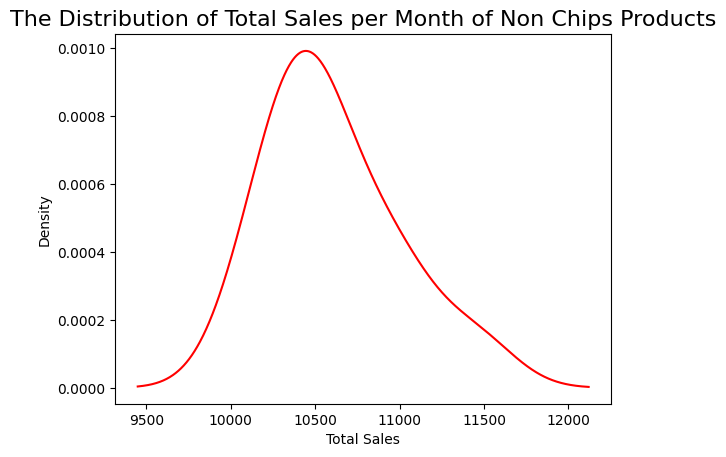

In [123]:
total_monthly_sales = df_nochips.groupby("MONTH")["TOT_SALES"].sum()

total_monthly_sales.plot(kind="kde",color='r')
plt.ylabel("Density")
plt.xlabel("Total Sales")
plt.title("The Distribution of Total Sales per Month of Non Chips Products",fontsize=16);

In [124]:
total_monthly_sales

,TOT_SALES
MONTH,
1,11048.5
2,10185.0
3,10492.4
4,10470.9
5,10116.4
6,10402.7
7,10760.8
8,10317.3
9,10452.9


- Similar possibility applies to non-chips products but it has a slight skew towards the positive direction. This maybe due to events of not opening the shops early.

### Data analysis on customer segments

 ##### Let's start with calculating total sales by LIFESTAGE individuals

In [125]:
lifestage_sales = df_chips.groupby("LIFESTAGE")["TOT_SALES"].agg('sum').sort_values(ascending=False)

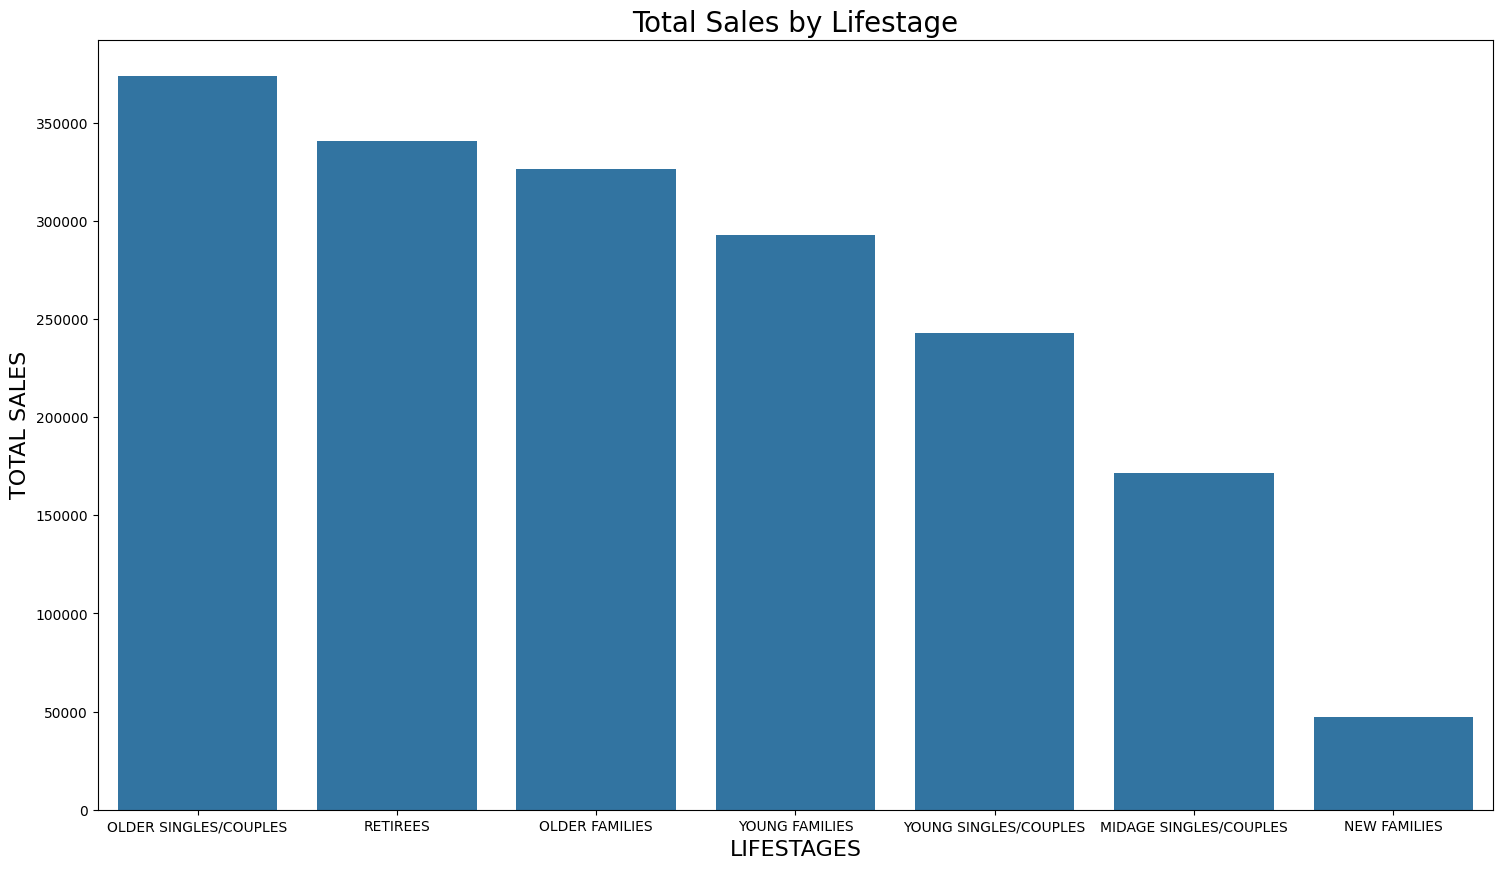

In [126]:
plt.figure(figsize=(18,10))
sns.barplot(lifestage_sales)
plt.title("Total Sales by Lifestage",fontsize=20)
plt.xlabel("LIFESTAGES",fontsize=16)
plt.ylabel("TOTAL SALES",fontsize=16)
plt.savefig("lifestage-total-sales.png");

In [127]:
fig = px.bar(data_frame=lifestage_sales,y=lifestage_sales.values,x=lifestage_sales.index)
fig.update_layout(xaxis_title="LIFESTAGES",yaxis_title="TOTAL SALES",title="Total Sales by Lifestage")
fig.show();

- From the above visualisation, it indicates that most of our customers falls under the LIFESTAGE [OLDER SINGLES/COUPLES, RETIREES,OLDER FAMILIES, YOUNG FAMILIES] in decreasing order of chips purhasing total sales
- Also less of the customers are in the [YOUNG SINGLES/COUPLES, MIDAGE SINGLES/COUPLES,NEW FAMILIES], in a decreasing order of chips purhasing total sales.
- Therefore we can now see obviously the lifestages of our customers and their various chips purhasing total sales.
- This will aid us target the lifestages that buys a lot of the chips products.

##### Let's observe the total sales by PREMIUM CUSTOMER

In [128]:
premium_customer_sales = df_chips.groupby("PREMIUM_CUSTOMER")["TOT_SALES"].agg('sum')

In [129]:
fig = px.bar(data_frame=premium_customer_sales,y=premium_customer_sales.values,x=premium_customer_sales.index)
fig.update_layout(xaxis_title="premium customer",yaxis_title="TOTAL SALES",title="Total Sales by premium customer")
fig.show();

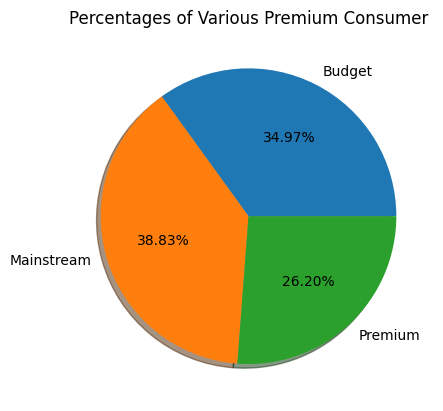

In [130]:
plt.pie(premium_customer_sales,labels=premium_customer_sales.index,autopct="%0.2f%%",shadow=2)
plt.title("Percentages of Various Premium Consumer")
plt.savefig("Chips-Consumer-premium.png");

- The customer segment clearly shows that most of the customers about 38.83% of sales are under the Mainstream segment.
- Moreover, 34.97% of sales are under the Budget segment.
- However, fewer of the customers about 26.20% sales are under the Premium customer segment.
 - we can conclude that most of the store sales are from the Mainstream segment.

##### How the Units of Chips products bought affects Total Sales by "LIFESTAGE"

In [131]:
lifestage_units = df_chips.groupby("LIFESTAGE")["PROD_QTY"].sum().sort_values(ascending=True).round(4)

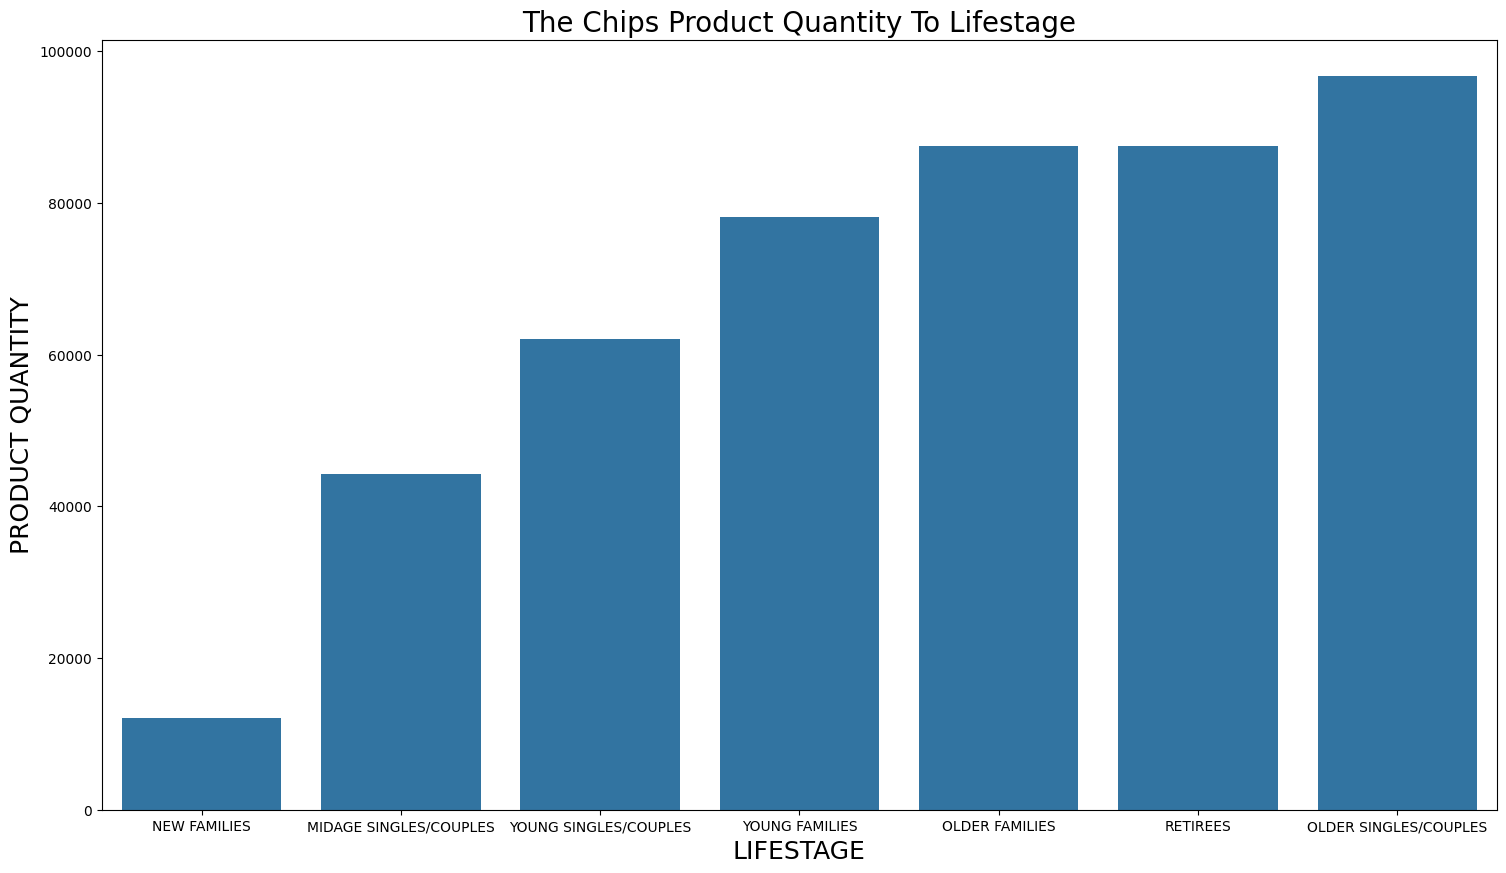

In [132]:
plt.figure(figsize=(18,10))
sns.barplot(lifestage_units)
plt.title("The Chips Product Quantity To Lifestage",fontsize=20)
plt.xlabel("LIFESTAGE",fontsize=18)
plt.ylabel("PRODUCT QUANTITY",fontsize=18)
plt.savefig("chips-quantity-lifestage.png");

In [133]:
fig = px.bar(data_frame=lifestage_units,x=lifestage_units.values,y=lifestage_units.index)
fig.update_layout(yaxis_title="LIFESTAGE",xaxis_title="PRODUCT QUANTITY",title="The Chips Product Quantity To Lifestage")
fig.show();

- It is obvious that the quantity of chips purchased affects the sales.
- Hences the higher the quantity of chips product bought by LIFESTAGE the higher the total sales
- In fact between the OLDER FAMILIES and RETIREES Lifestages shares almost the same preferences

##### How the Units of products affects Total Sales by "PREMIUM CUSTOMER"

In [134]:
premium_units =df_chips.groupby("PREMIUM_CUSTOMER")["PROD_QTY"].agg("sum").sort_values(ascending=True).round(4)

In [135]:
premium_units

,PROD_QTY
PREMIUM_CUSTOMER,
Premium,123281
Budget,164973
Mainstream,179942


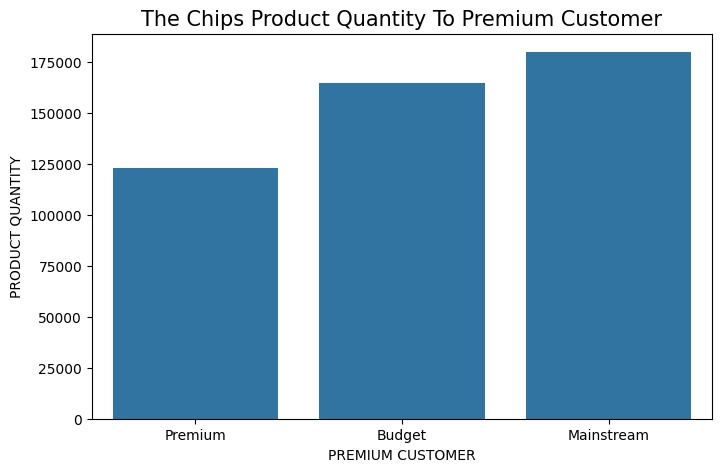

In [136]:
plt.figure(figsize=(8,5))
sns.barplot(premium_units)
plt.title("The Chips Product Quantity To Premium Customer",fontsize=15)
plt.xlabel("PREMIUM CUSTOMER",fontsize=10)
plt.ylabel("PRODUCT QUANTITY",fontsize=10)
plt.savefig("chips-quantity-premium_customer.png");

In [137]:
fig = px.bar(data_frame=premium_units,x=premium_units.values,y=premium_units.index)
fig.update_layout(yaxis_title="PREMIUM CUSTOMER",xaxis_title="PRODUCT QUANTITY",title="The Chips Product Quantity To Premium Customer")
fig.show();

- From the above analysis it clearly shows that, the quantity of chips bought by the Premium_Customer affects the total sales
- Hence, the higher the quantity of chips product bought the higher the total sales

#### Percentage of customer segments for LIFESTAGES and PREMIUM_CUSTOMER

In [138]:
data = pd.crosstab(index=df_chips["PREMIUM_CUSTOMER"],columns=df_chips["LIFESTAGE"],normalize=True)*100


In [139]:
fig = px.bar(
        data_frame=data,
        barmode="group",

    )
    # Set axis labels
fig.update_layout(xaxis_title="PREMIUM_CUSTOMER",yaxis_title="FREQUENCY [%]",title="Percentage of Premium Customer by Lifestage")
fig.show()

- Majority of the OLDER FAMILIES, YOUNG FAMILIES and OLDER SINGLES/COUPLES customers falls under the Budget chips products. Followed by the RETIREES and YOUNG SINGLES/COUPLES. However very less of the NEW FAMILIES and MIDAGE SINGLES/COUPLES falls under the Budget.
- Majority of the RETIREES, YOUNG SINGLES/COUPLES and OLDER SINGLES/COUPLES also falls under the Mainstream . Followed by the OLDER FAMILIES, YOUNG FAMILIES and MIDAGE SINGLES/COUPLES. As usual very few of the NEW FAMILIES falls under the Mainstream.
- Lastly, majority of the OLDER SINGLES/COUPLES are Premium, followed by RETIREES,YOUNG FAMILIES and OLDER FAMILIES whilst few of MIDAGE SINGLES/COUPLES, YOUNG SINGLES/COUPLES and NEW FAMILIES falls under premium.
- In summary, this gives a clear picture on which kind of customer segments and lifestages Managers should target when selling chips products. Generally very few of the NEW FAMILIES purchase chips product and this maybe due to the population of NEW FAMILIES around.
  

In [140]:
brand_lifestage = pd.crosstab(index=df_chips["BRAND"],columns=df_chips["LIFESTAGE"],normalize=True)*100
fig = px.bar(
        data_frame=brand_lifestage,
        barmode="group",

    )
    # Set axis labels
fig.update_layout(xaxis_title="BRAND",yaxis_title="FREQUENCY [%]",title="Perctange of Brand Preference by Lifestage")
fig.show()

- The above visualisation shows each customer with the brand of prefrence by lifestage
- Generally, OLDER SINGLES/COUPLES purchases much of the chips brands compared to the rest of lifestages, with a higher preference for kettle .
- Most of the OLDER FAMILIES prefers much of natural, red rock deli and ww chips brand.
- Almost all the customers do not prefer much of burger, css, cheetos, cheezels, french, sunbites and woolworths chips products and retailers can encourage promotion expecially during the month of December to improve those products sales.
- This will help retailers know the particular brand of chips prefered by their individual customers and to have an accurate target.

In [141]:
brand_customer = pd.crosstab(index=df_chips["BRAND"],columns=df_chips["PREMIUM_CUSTOMER"],normalize=True)*100
fig = px.bar(
        data_frame=brand_customer,
        barmode="group",

    )
    # Set axis labels
fig.update_layout(xaxis_title="BRAND",yaxis_title="FREQUENCY [%]",title="Perctange of Brand Preference by Premium_Customer")
fig.show()

- The above visualisation shows each customer with the brand of prefrence by premium_customer
- Generally, most of the Mainstream segment prefers chips product compared to the rest of the segments.
- Budget segment prefers much of ww, woolworths, sunbites, css, burger, french and natural chips brand to the rest of the segments, due to their lower average unit price.
- Premium purchases almost less for all chips products compared to the rest of the premium_customer
- This help us uncover the reality of customer segment preferences based on the specific chips brand

 #### Perform an independent t-test between mainstream vs premium and budget midage and  young singles and couple

In [142]:
np.random.Generator #Ensuring reproducibility

numpy.random._generator.Generator

##### Budget t-test

In [143]:
budget_sales =  df_chips[df_chips["PREMIUM_CUSTOMER"]=="Budget"]

budget_midage = budget_sales[budget_sales["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES"]["TOT_SALES"]
budget_young = budget_sales[budget_sales["LIFESTAGE"]=="YOUNG SINGLES/COUPLES"]["TOT_SALES"]

t_stat_b,p_value_b = ttest_ind(budget_midage,budget_young,equal_var=False,axis=0)

print(f"t_stat = {round(t_stat_b,3)}")
print(f"t_stat = {p_value_b}")
print(f"p_value = {p_value_b < 0.05}")

t_stat = 9.54
t_stat = 1.7641178662113296e-21
p_value = True


- From the hypothetical t-test above, it shows that there is a significant difference between the budget for MIDAGE SINGLES/COUPLES and budget for YOUNG SINGLES/COUPLES.
- It clearly shows that the statistical mean difference between these two variables comparison is significantly high as 9.5

##### Mainstream t-test

In [144]:
mainstream_sales =  df_chips[df_chips["PREMIUM_CUSTOMER"]=="Mainstream"]

mainstream_midage = mainstream_sales[mainstream_sales["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES"]["TOT_SALES"]
mainstream_young = mainstream_sales[mainstream_sales["LIFESTAGE"]=="YOUNG SINGLES/COUPLES"]["TOT_SALES"]

t_stat_m,p_value_m = ttest_ind(mainstream_midage,mainstream_young,equal_var=False,axis=0)

print(f"t_stat = {round(t_stat_m,3)}")
print(f"p_value = {p_value_m}")
print(f"p_value = {p_value_m < 0.05}")

t_stat = 2.616
p_value = 0.0088969871107644
p_value = True


- Considering the Mainstream for MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES, there is significant differences in their unit price.
- This explains with a 2.6 statistical mean difference between the two variables unit prices under the Mainstream

##### Premium t-test

In [145]:
premium_sales =  df_chips[df_chips["PREMIUM_CUSTOMER"]=="Premium"]

premium_midage = premium_sales[premium_sales["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES"]["TOT_SALES"]
premium_young = premium_sales[premium_sales["LIFESTAGE"]=="YOUNG SINGLES/COUPLES"]["TOT_SALES"]

t_stat_p,p_value_p = ttest_ind(premium_midage,premium_young,equal_var=False,axis=0)

print(f"t_stat = {round(t_stat_p,3)}")
print(f"t_stat = {p_value_p}")
print(f"p_value = {p_value_p < 0.05}")

t_stat = 10.516
t_stat = 9.446849254405408e-26
p_value = True


- The above t-test hypothesis with p_value less than 0.05 indicates a significant difference between MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES for Premium.
- The mean preference difference between MIDAGE SINGLES/COUPLES and YOUNG SINGLES/COUPLES is 10.5, indicating a clear difference between them for premium.

In summary,  the unit price for mainstream, young and mid-age singles and couples are not significantly higher than
that of budget or premium, young and midage singles and couples. But the premium is extremely significant compared to the budget, due to the statistical mean difference of the independent variables and lower value of the p_value.

## MODELS BUILDING

#### Importing necessary Model building Libraries

In [146]:
# data splitting and feature transformation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder #for categorical encoding

#models for training
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

#pipeline for streamlining the workflow
from sklearn.pipeline import Pipeline, make_pipeline

#model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

- 1  First split the data into independent(feature variables) and target variable
- 2 Split data into training(60%), testing(20%) and validation(20%)

In [147]:
#Setting the model baseline
baseline = df_chips.groupby("TOT_SALES").value_counts(normalize=True).max()
print(f"The baseline of the model is : {baseline:.3f}%")

The baseline of the model is : 0.500%


In [148]:
#Let's drop STORE_NBR and LYLTY_CARD_NBR since they have perfect positive correlation. Include CHIPS
X = df_chips.drop(["STORE_NBR","LYLTY_CARD_NBR","CHIPS","TOT_SALES"], axis=1)

y = df_chips.TOT_SALES


In [149]:
#Splitting into training and temporary data
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.4)

In [150]:
#Splitting into testing and validating data
X_test,X_valid,y_test,y_valid = train_test_split(X_temp,y_temp,test_size=0.5)

In [151]:
print(f"The shape of the X_train : {X_train.shape}")
print(f"The shape of the y_train: {y_train.shape}")
print(f"The shape of the X_test: {X_test.shape}")
print(f"The shape of the y_test: {y_test.shape}")
print(f"The shape of the X_valid: {X_valid.shape}")
print(f"The shape of the y_valid: {y_valid.shape}")

The shape of the X_train : (147731, 9)
The shape of the y_train: (147731,)
The shape of the X_test: (49244, 9)
The shape of the y_test: (49244,)
The shape of the X_valid: (49244, 9)
The shape of the y_valid: (49244,)


In [152]:
#Models in a dictionary
models = {
    "support Vector machine":SVR(),
    "xgboost":XGBRegressor(),
    "gradientboosting":GradientBoostingRegressor(),
    "randomforest":RandomForestRegressor()
}

##### Training and Evaluating the model

In [153]:
%%time
# A for loop for looping through the models dictionary to train and evaluate the individual models
for name, model in models.items():
   final_model = make_pipeline(OneHotEncoder(handle_unknown='ignore'),model)
   final_model.fit(X_train,y_train)
   print("Name : ",name)
   print(f"Percentage Score : {round(final_model.score(X_test,y_test),4)*100}%")
   print("M.S.E : ", round(mean_squared_error(final_model.predict(X_test),y_test),4))
   print("M.A.E : ", round(mean_absolute_error(final_model.predict(X_test),y_test),4))
   print("R2 Score : ", round(r2_score(final_model.predict(X_test),y_test),4))

Name :  support Vector machine
Percentage Score : 98.58%
M.S.E :  0.0829
M.A.E :  0.212
R2 Score :  0.988
Name :  xgboost
Percentage Score : 99.92%
M.S.E :  0.0047
M.A.E :  0.0131
R2 Score :  0.9992
Name :  gradientboosting
Percentage Score : 97.16%
M.S.E :  0.1659
M.A.E :  0.3284
R2 Score :  0.9639
Name :  randomforest
Percentage Score : 99.92%
M.S.E :  0.0047
M.A.E :  0.0012
R2 Score :  0.9992
CPU times: user 59min 26s, sys: 3.48 s, total: 59min 29s
Wall time: 59min 20s


In [154]:
#  All the models above has higher performance however the XGBoostRegessor and RandomForestRegressor model has the same performance

In [155]:
model = make_pipeline(OneHotEncoder(handle_unknown='ignore'),RandomForestRegressor(n_estimators=250))

In [156]:
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=250))])

#### Checking the model performance on the validating data

In [ ]:
%%time
model.score(X_valid,y_valid)